LIBRARIES

In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

DATES

In [3]:
# Define path to files
# For MacOS
# PATH = "/Users/derekbanas/Documents/Tutorials/Python for Finance/Stocks/"
# For Windows
PATH = "C:/Users/yeerd/OneDrive/Masaüstü/stock_data/Stock_List/"

# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = "2021-08-19"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

STOCK NAMES IN A LIST

In [4]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
tickers.sort()
tickers

['A',
 'AA',
 'AAL',
 'AAME',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAWW',
 'ABBV',
 'ABC',
 'ABCB',
 'ABEO',
 'ABG',
 'ABIO',
 'ABM',
 'ABMD',
 'ABR',
 'ABT',
 'ABTX',
 'AC',
 'ACAD',
 'ACBI',
 'ACC',
 'ACCO',
 'ACER',
 'ACGL',
 'ACHC',
 'ACHV',
 'ACIW',
 'ACLS',
 'ACM',
 'ACMR',
 'ACN',
 'ACNB',
 'ACOR',
 'ACRE',
 'ACRS',
 'ACRX',
 'ACTG',
 'ACU',
 'ACY',
 'ADBE',
 'ADC',
 'ADES',
 'ADI',
 'ADM',
 'ADMA',
 'ADMP',
 'ADMS',
 'ADNT',
 'ADP',
 'ADS',
 'ADSK',
 'ADTN',
 'ADUS',
 'ADVM',
 'ADXS',
 'AE',
 'AEE',
 'AEHR',
 'AEIS',
 'AEL',
 'AEMD',
 'AEO',
 'AEP',
 'AERI',
 'AES',
 'AEY',
 'AFG',
 'AFI',
 'AFL',
 'AGCO',
 'AGEN',
 'AGFS',
 'AGIO',
 'AGLE',
 'AGM',
 'AGNC',
 'AGO',
 'AGR',
 'AGRX',
 'AGTC',
 'AGX',
 'AGYS',
 'AHH',
 'AHT',
 'AIG',
 'AIMC',
 'AIN',
 'AINC',
 'AIR',
 'AIRG',
 'AIRI',
 'AIRT',
 'AIT',
 'AIV',
 'AIZ',
 'AJG',
 'AJRD',
 'AJX',
 'AKAM',
 'AKBA',
 'AKR',
 'AKTS',
 'AL',
 'ALB',
 'ALBO',
 'ALCO',
 'ALDX',
 'ALE',
 'ALEX',
 'ALG',
 'ALGN',
 'ALGT',
 'AL

DATAFRAME FROM CSV

In [5]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

DF TO CSV

In [6]:
def save_dataframe_to_csv(df, ticker):
    df.to_csv(PATH + ticker + '.csv')

1ST VALID DATE IN DF

In [8]:
# Receives a start and end date and returns the 1st date in that range
def get_valid_dates(df, sdate, edate):
    
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate) 
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
    
        # Get smallest date that matches
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
    
        # Add leading zeros to date
        # Split string on - and if a number is less than 2 add a zero in front
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
        print(date_leading, " ", date_ending)
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending

ROI

In [9]:
# Get ROI between 2 dates
def roi_between_dates(df, sdate, edate):
    
    try:
        # Gets the Adj Close price for 1st & last date 
        start_val = df.loc[sdate,'Adj Close'] 
        end_val = df.loc[edate,'Adj Close']
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data Corrupted")
    else:
        return roi

MEAN

In [10]:
def get_mean_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].mean()

STD

In [11]:
def get_sd_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].std()

Coeff. of Variation

In [12]:
def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_sd_between_dates(df, sdate, edate)
    return sd / mean

TEST FUNCTIONS

In [13]:
# Get our 1st ticker
tickers[0]
print("Dataframe for Ticker", tickers[0])

# Get a dataframe for that ticker
stock_a = get_df_from_csv(tickers[0])
stock_a

# Get the first and last valid date in the date range
print(get_valid_dates(stock_a, '2020-01-01', '2020-12-31'))
sdate, edate = get_valid_dates(stock_a, '2020-01-01', '2020-12-31')
sdate
edate

print("Adj Close Mean :", get_mean_between_dates(stock_a, sdate, edate))
print("Adj Close Standard Deviation :", get_sd_between_dates(stock_a, sdate, edate))
print("Adj Close Coefficient of Variation :", get_cov_between_dates(stock_a, sdate, edate))

stock_a = stock_a.set_index(['Date'])
stock_a

print("Return on Investment since 2020:", roi_between_dates(stock_a, sdate, edate))

Dataframe for Ticker A
2020-01-02   2020-12-31
('2020-01-02', '2020-12-31')
2020-01-02   2020-12-31
Adj Close Mean : 91.88143609062074
Adj Close Standard Deviation : 13.810425880870476
Adj Close Coefficient of Variation : 0.15030703119669941
Return on Investment since 2020: 0.3875002142531709


COV and ROI for all stocks

In [14]:
def get_cov_ror(tickers, sdate, edate):
    # Define column names for dataframe
    col_names = ["Ticker", "COV", "ROI"]
    
    # Create dataframe with column names
    df = pd.DataFrame(columns = col_names)
    
    for ticker in tickers:
        print("Working on :", ticker)
        s_df = get_df_from_csv(ticker)
    
        sdate2, edate2 = get_valid_dates(s_df, sdate, edate)
    
        cov = get_cov_between_dates(s_df, sdate2, edate2)
    
        # Set date as index
        s_df = s_df.set_index(['Date'])
        roi = roi_between_dates(s_df, sdate2, edate2)

        # Add stock data to new dataframe row
        # len provides the length of the dataframe which is the next open index
        df.loc[len(df.index)] = [ticker, cov, roi]
    
    return df

TEST COV-ROI

In [15]:
tickers = [e for e in tickers if e not in ("CRC","GRUB","AAN","ARNC","USWS","USX")]
#tickers.count("AAPL")
market_df = get_cov_ror(tickers, '2020-08-01', '2021-08-01')

Working on : A
2020-08-03   2021-07-30
Working on : AA
2020-08-03   2021-07-30
Working on : AAL
2020-08-03   2021-07-30
Working on : AAME
2020-08-03   2021-07-30
Working on : AAOI
2020-08-03   2021-07-30
Working on : AAON
2020-08-03   2021-07-30
Working on : AAP
2020-08-03   2021-07-30
Working on : AAPL
2020-08-03   2021-07-30
Working on : AAT
2020-08-03   2021-07-30
Working on : AAWW
2020-08-03   2021-07-30
Working on : ABBV
2020-08-03   2021-07-30
Working on : ABC
2020-08-03   2021-07-30
Working on : ABCB
2020-08-03   2021-07-30
Working on : ABEO
2020-08-03   2021-07-30
Working on : ABG
2020-08-03   2021-07-30
Working on : ABIO
2020-08-03   2021-07-30
Working on : ABM
2020-08-03   2021-07-30
Working on : ABMD
2020-08-03   2021-07-30
Working on : ABR
2020-08-03   2021-07-30
Working on : ABT
2020-08-03   2021-07-30
Working on : ABTX
2020-08-03   2021-07-30
Working on : AC
2020-08-03   2021-07-30
Working on : ACAD
2020-08-03   2021-07-30
Working on : ACBI
2020-08-03   2021-07-30
Working

In [16]:
# Get top 20 stocks ROI
market_df.sort_values(by=['ROI'], ascending=False).head(20)


,Ticker,COV,ROI
1779,NAV,3.073849,556.966551
1897,OAS,0.787113,147.570745
2811,WLL,0.491940,59.909094
1113,GME,0.941862,37.824094
2580,TRCH,0.954358,14.468750
2765,VTNR,1.277578,14.212014
807,DXLG,1.092402,13.114286
1093,GEVO,0.716535,9.875000
2893,ZDGE,0.676113,9.274247
2215,RIOT,0.786259,8.414286


MERGE MULTIPLE STOCKS

In [17]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        df['Date'] = pd.to_datetime(df['Date'])
        # Use a mask to grab data between defined dates
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

CORRELATIONS

<AxesSubplot:>

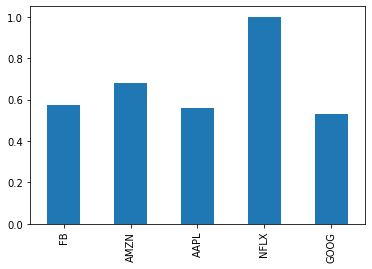

In [18]:
# Correlation tells us how closely 2 stocks returns move together
# Correlation is a standardized value lying between -1 and 1
# When this value is greater that .5 we say that these stocks are strongly correlated
# Of course each stocks price is perfectly correlated with itself

# We focus on the correlation of returns because investors care about returns 

# Merge all stock price data into 1 dataframe
faang_list = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *faang_list)
mult_df

# Generate a Correlation Matrix
mult_df.corr()

# We can look at the correlation between Netflix and the others
mult_df.corr()['NFLX']

# We can plot this in a bar chart
mult_df.corr()['NFLX'].plot(kind='bar')

VARIANCE OF A STOCK

In [19]:
# Remember variance is a measure of how spread out a data set is
# Get Netflix variance
mult_df['NFLX'].var()

# Annualize by getting the number of samples and multiply
days = len(mult_df.index) # 253

nflx_a_var = mult_df['NFLX'].var() * 253
nflx_a_var

0.2143523699684345

COVARIANCE OF A STOCK

In [20]:
mult_df.cov() * 253

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.211498,0.121090,0.165004,0.122340,0.141870
AMZN,0.121090,0.148918,0.125888,0.121261,0.100904
AAPL,0.165004,0.125888,0.218483,0.120969,0.135044
NFLX,0.122340,0.121261,0.120969,0.214352,0.094118
GOOG,0.141870,0.100904,0.135044,0.094118,0.147431


PORTFOLIO VARIANCE

In [21]:
# Let's create a portfolio made up of Facebook & Newmont Corporation
port_list = ["FB", "NEM"]
port_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *port_list)
port_df

# Generate a Correlation Matrix to see that they are not correlated
port_df.corr()

# Get prices at the beginning of Jan 2020 to calculate weight of both stocks
price_df = merge_df_by_column_name('Adj Close',  '2020-1-1', '2020-12-31', *["FB","NEM"])
price_df.head()

# I'll buy 1 share of FB at 209.78 & 5 of NEM for 41.74 for a total of 208.70
# Total Value = $418.48
fb_wt = 209.78 / 418.48
nem_wt = 208.70 / 418.48
fb_wt = .5012 # .5012
nem_wt = .4988 # .4987 and we'll change it to .4988 so they equal 1
wts = np.array([fb_wt, nem_wt])

# The portfolio variance is found from matrix multiplication
# We transpose the weights, multiply by the covarience and then the weight to get 
# the covariance of the portfolio
wts.T
port_var = np.dot(wts.T, np.dot(port_df.cov() * 253, wts))
print("Portfolio Var :", port_var)
print("FB Var :", port_df["FB"].var() * 253)
print("NEM Var :", port_df["NEM"].var() * 253)

Portfolio Var : 0.12743411425235848
FB Var : 0.211497710657075
NEM Var : 0.21334763765730672


FINANCE 4

SECTORS

In [22]:

sec_df = pd.read_csv("C:/Users/yeerd/OneDrive/Masaüstü/stock_data/stock_sectors.csv")
sec_df

# Get Industrials DF
indus_df = sec_df.loc[sec_df['Sector'] == "Industrials"]
health_df = sec_df.loc[sec_df['Sector'] == "Health Care"]
it_df = sec_df.loc[sec_df['Sector'] == "Information Technology"]
comm_df = sec_df.loc[sec_df['Sector'] == "Communication Services"]
staple_df = sec_df.loc[sec_df['Sector'] == "Consumer Staples"]
discretion_df = sec_df.loc[sec_df['Sector'] == "Consumer Discretionary"]
utility_df = sec_df.loc[sec_df['Sector'] == "Utilities"]
financial_df = sec_df.loc[sec_df['Sector'] == "Financials"]
material_df = sec_df.loc[sec_df['Sector'] == "Materials"]
restate_df = sec_df.loc[sec_df['Sector'] == "Real Estate"]
energy_df = sec_df.loc[sec_df['Sector'] == "Energy"]

ROI for sectors

In [23]:
def get_rois_for_stocks(stock_df):
    # Will hold all tickers & stock rois
    tickers = []
    rois = []

    # iterrows provides the index and column for each row in the DF
    for index, row in stock_df.iterrows():
        df = get_df_from_csv(row['Symbol'])
    
        # If we can't find the ticker delete it from the dataframe
        if df is None:
            pass
            # print(row['Symbol'], " is not available")
        else:
            tickers.append(row['Symbol'])
            sdate, edate = get_valid_dates(df, '2018-01-01', '2020-12-31')
            df = df.set_index(['Date'])
            roi = roi_between_dates(df, sdate, edate)
            rois.append(roi)
    return pd.DataFrame({'Ticker':tickers, 'ROI':rois})

In [24]:
industrial = get_rois_for_stocks(indus_df)
health_care = get_rois_for_stocks(health_df)
it = get_rois_for_stocks(it_df)
commun = get_rois_for_stocks(comm_df)
staple = get_rois_for_stocks(staple_df)
discretion = get_rois_for_stocks(discretion_df)
utility = get_rois_for_stocks(utility_df)
finance = get_rois_for_stocks(financial_df)
material = get_rois_for_stocks(material_df)
restate = get_rois_for_stocks(restate_df)
energy = get_rois_for_stocks(energy_df)

2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
File Doesn't Exist
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
File Doesn't Exist
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02   2020-12-31
File Doesn't Exist
2018-01-02   2020-12-31
2018-01-02   2020-12-31
File Doesn't Exist
2018-01-02   2020-12-31
2018-01-02   2020-12-31
2018-01-02  

SECTOR TESTS (TOPS)

In [27]:
industrial.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
24,GNRC,3.734749
10,CPRT,1.918578
57,TDG,1.518984
9,CTAS,1.325593
42,ODFL,1.202971


In [28]:
health_care.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
25,DXCM,5.375582
33,IDXX,2.167543
59,WST,1.887307
49,RMD,1.575014
16,CTLT,1.475499


In [29]:
it.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
21,ENPH,66.488464
2,AMD,7.352459
50,PAYC,4.622203
57,NOW,3.178471
70,ZBRA,2.705814


In [30]:
commun.sort_values(by=['ROI'], ascending=False).head(20)

,Ticker,ROI
13,NFLX,1.689262
20,TWTR,1.209302
17,TMUS,1.105715
4,CHTR,0.895722
18,TTWO,0.840804
12,LYV,0.722861
19,DIS,0.666390
2,GOOG,0.644958
1,GOOGL,0.633082
10,FB,0.505677


In [31]:
staple.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
10,EL,1.145196
9,COST,1.112863
19,MKC,0.977708
3,CHD,0.838448
25,PG,0.674050


In [32]:

discretion.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
52,TSLA,10.007861
17,ETSY,7.541047
10,CMG,3.733606
43,POOL,1.931030
51,TGT,1.839621


In [33]:
utility.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
0,AES,1.402997
18,NEE,1.136332
4,AWK,0.819223
26,WEC,0.530405
27,XEL,0.519897


In [34]:

finance.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
39,MSCI,2.612068
34,MKTX,1.860333
6,AJG,1.112315
37,MCO,1.044882
49,SPGI,1.012123


In [35]:
material.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
3,BLL,1.474668
21,SHW,0.824243
13,LIN,0.785525
0,APD,0.771644
16,NEM,0.689577


In [36]:
restate.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
21,SBAC,0.772695
8,EQIX,0.692928
17,PLD,0.689758
1,AMT,0.685782
5,CCI,0.622156


In [37]:
energy.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
9,HES,0.168441
15,OKE,-0.131482
10,KMI,-0.146362
3,COP,-0.217487
20,WMB,-0.218709


LIST

In [38]:
port_list = ["GNRC", "DXCM", "AMD", "NFLX", "COST", "TGT", "AES", "MSCI", 
             "NEM", "SBAC", "HES"]

CORR CHECK

In [39]:
mult_df = merge_df_by_column_name('daily_return',  '2018-01-01', 
                                  '2020-12-31', *port_list)
mult_df

# Generate a Correlation Matrix
mult_df.corr()

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,SBAC,HES
GNRC,1.000000,0.289526,0.395187,0.340732,0.465304,0.338411,0.433325,0.515742,0.250697,0.444762,0.426870
DXCM,0.289526,1.000000,0.328297,0.307643,0.265366,0.196806,0.218423,0.469509,0.147494,0.243462,0.243240
AMD,0.395187,0.328297,1.000000,0.459581,0.394315,0.340573,0.258974,0.485819,0.191355,0.294906,0.288337
NFLX,0.340732,0.307643,0.459581,1.000000,0.430674,0.259971,0.204159,0.449132,0.103639,0.216935,0.217857
COST,0.465304,0.265366,0.394315,0.430674,1.000000,0.500433,0.319886,0.482322,0.183141,0.455022,0.234526
TGT,0.338411,0.196806,0.340573,0.259971,0.500433,1.000000,0.305004,0.325772,0.092757,0.304365,0.245106
AES,0.433325,0.218423,0.258974,0.204159,0.319886,0.305004,1.000000,0.483399,0.176918,0.333249,0.470414
MSCI,0.515742,0.469509,0.485819,0.449132,0.482322,0.325772,0.483399,1.000000,0.258932,0.498281,0.411647
NEM,0.250697,0.147494,0.191355,0.103639,0.183141,0.092757,0.176918,0.258932,1.000000,0.275681,0.149387
SBAC,0.444762,0.243462,0.294906,0.216935,0.455022,0.304365,0.333249,0.498281,0.275681,1.000000,0.273548


In [40]:
# Get the number of samples
days = len(mult_df.index)
days

756

STOCK PRICE ON DATE

In [42]:
def get_stock_price_on_date(ticker, date):
    df = get_df_from_csv(ticker)
    df = df.set_index(['Date'])
    return df.loc[date,'Adj Close']

In [43]:
# 01-04-2021 is the 1st date in 2021
print("GNRC $", get_stock_price_on_date('GNRC', '2021-01-04')) # 2 449.12
print("DXCM $", get_stock_price_on_date('DXCM', '2021-01-04')) # 1 357.74
print("AMD $", get_stock_price_on_date('AMD', '2021-01-04')) # 4 369.2
print("NFLX $", get_stock_price_on_date('NFLX', '2021-01-04')) # 1 522.86
print("COST $", get_stock_price_on_date('COST', '2021-01-04')) # 1 377.88
print("TGT $", get_stock_price_on_date('TGT', '2021-01-04')) # 3 527.46
print("AES $", get_stock_price_on_date('AES', '2021-01-04')) # 18 410.76
print("MSCI $", get_stock_price_on_date('MSCI', '2021-01-04')) # 1 435.40
print("NEM $", get_stock_price_on_date('NEM', '2021-01-04')) # 7 434.49
print("SBAC $", get_stock_price_on_date('SBAC', '2021-01-04')) # 2 548.84
print("HES $", get_stock_price_on_date('HES', '2021-01-04')) # 9 472.23

# Total Investment
tot_inv = 449.12 + 357.74 + 369.2 + 522.86 + 377.88 + 527.46 + 410.76 + \
435.40 + 434.49 + 548.84 + 472.23
tot_inv

GNRC $ 224.5599975585937
DXCM $ 357.739990234375
AMD $ 92.3000030517578
NFLX $ 522.8599853515625
COST $ 377.8815307617188
TGT $ 175.82254028320312
AES $ 22.82006454467773
MSCI $ 435.3967590332031
NEM $ 62.0733871459961
SBAC $ 274.4242248535156
HES $ 52.46865844726562


4905.980000000001

ROI WEIGHT

In [44]:
def get_port_weight(price, total):
    return price / total

In [45]:
gnrc_w = get_port_weight(449.12, 4905.98)
dxcm_w = get_port_weight(357.74, 4905.98)
amd_w = get_port_weight(369.2, 4905.98)
nflx_w = get_port_weight(522.86, 4905.98)
cost_w = get_port_weight(377.88, 4905.98)
tgt_w = get_port_weight(527.46, 4905.98)
aes_w = get_port_weight(410.76, 4905.98)
msci_w = get_port_weight(435.40, 4905.98)
nem_w = get_port_weight(434.49, 4905.98)
sbac_w = get_port_weight(548.84, 4905.98)
hes_w = get_port_weight(472.23, 4905.98)

wts = np.array([gnrc_w, dxcm_w, amd_w, nflx_w, cost_w, tgt_w, aes_w, msci_w, \
                nem_w, sbac_w, hes_w])
wts

port_var = np.dot(wts.T, np.dot(mult_df.cov() * 756, wts))
print("Portfolio Covariance :", port_var)
print("GNRC Var :", mult_df["GNRC"].var() * 756)
print("NFLX Var :", mult_df["NFLX"].var() * 756)

Portfolio Covariance : 0.18221033377623252
GNRC Var : 0.4394654360724252
NFLX Var : 0.5477253623043383


Diversifiable Risk

In [46]:
# Diversifiable Risk = Portfolio Variance - All Weighted Variances
def calc_diversifiable_risk(df, tickers, weights):
    # Gets number of days
    days = len(mult_df.index)
    # Calculate covariance of portfolio
    port_covar = np.dot(weights.T, np.dot(df.cov() * days, weights)) 
    
    i = 0
    while i < len(tickers):
        wt_sq = weights[i] ** 2
        stk_var = mult_df[tickers[i]].var() * days
        wt_var = wt_sq * stk_var
        port_covar = port_covar - wt_var
        i += 1
    return port_covar

In [47]:
div_risk = calc_diversifiable_risk(mult_df, port_list, wts)
div_risk

0.13626654511704742

Risk that Can't be Diversified

In [48]:
print("Systematic Risk :", (port_var - div_risk))

Systematic Risk : 0.04594378865918511
